In [1]:
# Import the os module, for the os.walk function
import os

Gene numbers vs. repeat content (proportion of repeat masked bases)

In [4]:
# Set the directory you want to start from that contains *.stats files on GFF files and *.tbl files from RepeatMasker
rootDir = '.'

# create list of lists to collect repeat content and gene number per species
geneNameList = []
geneNumberList = []
repeatPropList = []

for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        if fname.endswith("stats"):
            with open(dirName + "/" + fname, 'r') as gene:
                for line in gene:
                    if not line.startswith("genes:"):
                        continue
                    else:
                        numb = line.strip().split()[1]
                        geneNumberList.append(int(numb))
                        geneNameList.append(dirName.strip("./"))
        elif fname.endswith("tbl"):
            with open(dirName + "/" + fname, 'r') as rep:
                for line in rep:
                    if not line.startswith("bases masked:"):
                        continue
                    else:
                        prop = line.strip().split()[5]
                        repeatPropList.append(float(prop))
        else:
            continue

print(len(geneNameList), geneNameList, len(geneNumberList), geneNumberList, len(repeatPropList), repeatPropList)

26 ['alepto', 'pbrasi', 'agerde', 'cpellu', 'gmarga', 'fcaled', 'aschen', 'acolom', 'cclaro_combined', 'deryth', 'amorro', 'ccandi_combined', 'depige', 'rpersi', 'scalos', 'rintra_combined', 'grosea', 'poculu', 'dheter', 'deburn', 'ccandi_k_combined', 'rirreg_combined', 'speluc', 'svisco', 'rfulgi', 'fmosse_combined'] 26 [14642, 11842, 13690, 22053, 46492, 17946, 19726, 14505, 15882, 28764, 18394, 15761, 15973, 37045, 11479, 18317, 26343, 11385, 16277, 12017, 16088, 23258, 18058, 14815, 19906, 16857] 26 [73.17, 25.81, 47.8, 74.8, 65.96, 51.64, 26.84, 83.56, 31.79, 64.79, 72.7, 32.04, 15.75, 67.56, 73.41, 51.05, 64.26, 21.11, 67.09, 39.34, 32.45, 29.03, 72.48, 25.02, 69.37, 52.94]


In [4]:
import matplotlib.pyplot as plt
import numpy as np

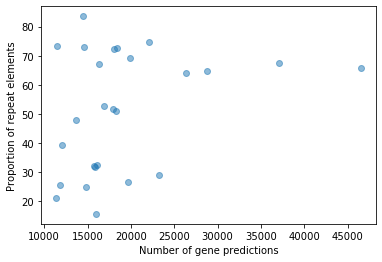

In [25]:
plt.scatter(geneNumberList, repeatPropList, alpha=0.5)
plt.xlabel('Number of gene predictions')
plt.ylabel('Proportion of repeat elements')

### add labels to points (currently, these are overlapping)
#index=0
#for xy in zip(geneNumberList, repeatPropList):
#    geneName=geneNameList[index]
#    plt.annotate("{}".format(geneName), xy, textcoords='data')
#    index += 1

### add a trend line (not very meaningful)
#z = np.polyfit(geneNumberList, repeatPropList, 1)
#p = np.poly1d(z)
#plt.plot(geneNumberList,p(geneNumberList))


plt.savefig('GeneNumber_vs_RepeatContent.png')
plt.show()

BUSCO results vs. repeat content

In [12]:
# Set the directory you want to start from that contains BUSCO short summary files, *.stats files on GFF files and *.tbl files from RepeatMasker
rootDir = '.'

# create list of lists to collect repeat content and gene number per species
geneNameList = []
dupPropList = []
compPropList = []
missPropList = []
geneNumberList = []
repeatPropList = []

for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        if fname.endswith("txt"):
            with open(dirName + "/" + fname, 'r') as busco:
                for line in busco:
                    if not line.startswith("\tC:"):
                        continue
                    else:
                        # get proportion of duplicated genes
                        busco_dup = line.strip().split(",")
                        dup_raw = busco_dup[1].strip("D:")
                        dup = dup_raw.strip("%]")
                        dupPropList.append(float(dup))
                        # get proportion of complete genes
                        busco_comp = line.strip("\t").split("%[")
                        comp = busco_comp[0].strip("C:")
                        compPropList.append(float(comp))
                        # get proportion of missing genes
                        miss_raw = busco_dup[3].strip("M:")
                        miss = miss_raw.strip("%")
                        missPropList.append(float(miss))
                        # get species name
                        geneNameList.append(dirName.strip("./"))
        elif fname.endswith("stats"):
            with open(dirName + "/" + fname, 'r') as gene:
                for line in gene:
                    if not line.startswith("genes:"):
                        continue
                    else:
                        numb = line.strip().split()[1]
                        geneNumberList.append(int(numb))
        elif fname.endswith("tbl"):
            with open(dirName + "/" + fname, 'r') as rep:
                for line in rep:
                    if not line.startswith("bases masked:"):
                        continue
                    else:
                        prop = line.strip().split()[5]
                        repeatPropList.append(float(prop))
        else:
            continue

print("gene names: ", len(geneNameList), geneNameList, "\nprop of duplicates: ", len(dupPropList), dupPropList, "\nprop of complete genes: ", len(compPropList), compPropList, "\nprop of missing genes: ", len(missPropList), missPropList, "\nprop of repeats: ", len(repeatPropList), repeatPropList)


gene names:  26 ['alepto', 'pbrasi', 'agerde', 'cpellu', 'gmarga', 'fcaled', 'aschen', 'acolom', 'cclaro_combined', 'deryth', 'amorro', 'ccandi_combined', 'depige', 'rpersi', 'scalos', 'rintra_combined', 'grosea', 'poculu', 'dheter', 'deburn', 'ccandi_k_combined', 'rirreg_combined', 'speluc', 'svisco', 'rfulgi', 'fmosse_combined'] 
prop of duplicates:  26 [1.5, 1.7, 1.8, 1.5, 1.5, 1.1, 22.8, 3.4, 7.8, 2.5, 4.5, 8.0, 3.4, 0.7, 0.1, 0.5, 0.4, 1.1, 0.4, 0.9, 8.6, 1.3, 0.7, 1.5, 0.1, 0.7] 
prop of complete genes:  26 [85.1, 91.5, 88.2, 88.4, 84.2, 84.6, 85.7, 51.8, 80.0, 85.0, 80.5, 80.7, 70.6, 48.2, 24.5, 82.8, 42.7, 78.7, 41.4, 79.9, 81.3, 90.6, 41.6, 89.0, 24.9, 85.1] 
prop of missing genes:  26 [9.2, 5.2, 8.5, 6.7, 9.9, 9.5, 8.5, 29.1, 13.1, 9.6, 10.0, 12.7, 17.8, 29.8, 63.4, 10.9, 42.9, 13.6, 45.9, 13.5, 12.8, 6.2, 43.9, 6.1, 52.7, 9.2] 
prop of repeats:  26 [73.17, 25.81, 47.8, 74.8, 65.96, 51.64, 26.84, 83.56, 31.79, 64.79, 72.7, 32.04, 15.75, 67.56, 73.41, 51.05, 64.26, 21.11, 67.0

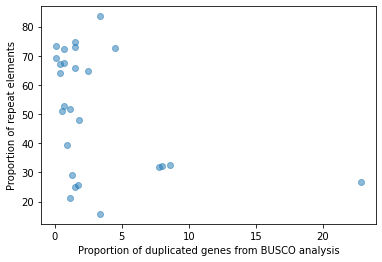

In [5]:
plt.scatter(dupPropList, repeatPropList, alpha=0.5)
plt.xlabel('Proportion of duplicated genes from BUSCO analysis')
plt.ylabel('Proportion of repeat elements')

### add labels to points (currently, these are overlapping)
#index=0
#for xy in zip(geneNumberList, repeatPropList):
#    geneName=geneNameList[index]
#    plt.annotate("{}".format(geneName), xy, textcoords='data')
#    index += 1

### add a trend line (not very meaningful)
#z = np.polyfit(geneNumberList, repeatPropList, 1)
#p = np.poly1d(z)
#plt.plot(geneNumberList,p(geneNumberList))


plt.savefig('DuplicatedGenes_vs_RepeatContent.png')
plt.show()

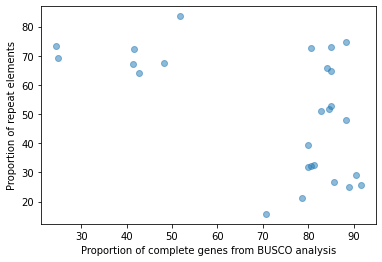

In [10]:
plt.scatter(compPropList, repeatPropList, alpha=0.5)
plt.xlabel('Proportion of complete genes from BUSCO analysis')
plt.ylabel('Proportion of repeat elements')

### add labels to points (currently, these are overlapping)
#index=0
#for xy in zip(geneNumberList, repeatPropList):
#    geneName=geneNameList[index]
#    plt.annotate("{}".format(geneName), xy, textcoords='data')
#    index += 1

### add a trend line (not very meaningful)
#z = np.polyfit(geneNumberList, repeatPropList, 1)
#p = np.poly1d(z)
#plt.plot(geneNumberList,p(geneNumberList))


plt.savefig('CompleteGenes_vs_RepeatContent.png')
plt.show()

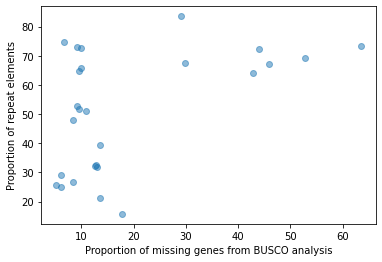

In [13]:
plt.scatter(missPropList, repeatPropList, alpha=0.5)
plt.xlabel('Proportion of missing genes from BUSCO analysis')
plt.ylabel('Proportion of repeat elements')

### add labels to points (currently, these are overlapping)
#index=0
#for xy in zip(geneNumberList, repeatPropList):
#    geneName=geneNameList[index]
#    plt.annotate("{}".format(geneName), xy, textcoords='data')
#    index += 1

### add a trend line (not very meaningful)
#z = np.polyfit(geneNumberList, repeatPropList, 1)
#p = np.poly1d(z)
#plt.plot(geneNumberList,p(geneNumberList))


plt.savefig('MissingGenes_vs_RepeatContent.png')
plt.show()